# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.064853e+01     8.031630e+00
 * time: 0.0034520626068115234
     1     2.872422e+01     3.927619e+00
 * time: 0.01581597328186035
     2     1.928271e+01     4.008898e+00
 * time: 0.032022953033447266
     3     1.405867e+01     2.676105e+00
 * time: 0.11735105514526367
     4     1.232810e+01     3.506580e+00
 * time: 0.12948989868164062
     5     1.224701e+01     2.975797e+00
 * time: 0.1411600112915039
     6     1.007523e+01     1.629148e+00
 * time: 0.15286493301391602
     7     8.892682e+00     1.648603e+00
 * time: 0.16461801528930664
     8     8.438044e+00     1.325825e+00
 * time: 0.17624807357788086
     9     8.233540e+00     7.573126e-01
 * time: 0.18779206275939941
    10     8.166378e+00     9.814119e-01
 * time: 0.19676589965820312
    11     8.083050e+00     5.237860e-01
 * time: 0.20556092262268066
    12     8.069300e+00     7.612078e-01
 * time: 0.21447205543518066
    13     8.044603e+00     5.990265e-01
 * tim

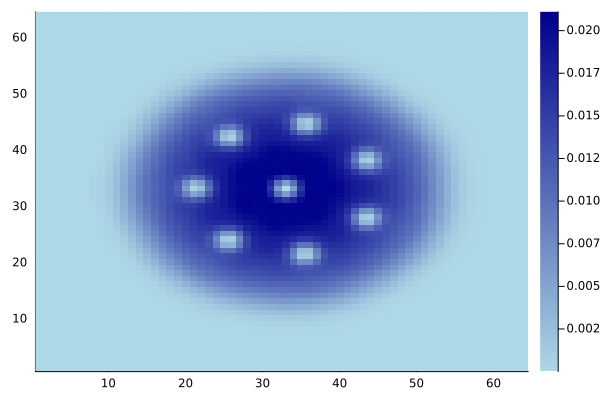

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)